### High resolution analysis of heterogeneous alveolar type II cells in emphysema and health reveals an airway origin of impaired alveolar regeneration 

AT2 sub-populations

In [1]:
## Load modules
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

# costome codes
import ma_codes as codes

# define color mapS
from matplotlib import colors
col = ["lightgray", "red", "darkred"] 
gray_red = colors.LinearSegmentedColormap.from_list("grouping", col, N = 128)

In [2]:
sc.settings.verbosity = 3   # verbosity: 0=’error’, 1=’warning’, 2=’info’, 3=’hint’, 4=more details, 5=even more details, etc.
# sc.logging.print_versions()
sc.logging.print_header()

/home/qianjianghu/miniconda3/lib/python3.7/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


scanpy==1.9.1 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.5


### Read in dataset

In [3]:
## Set Filepaths
out_folder = "./COPD_Hu_2023/"

In [4]:
# read in epithelial dataset
adata = sc.read(out_folder +'EpithelCOPD_annotated.h5ad')

# extract the ATII cluster
adata = adata[adata.obs['cell_type_refined'].isin(['AT2'])].copy()


In [5]:
# integrat with metadata
meta = pd.read_csv(out_folder + 'ATII_metadata.txt', sep='\t',index_col=0)
adata.obs = adata.obs.join(meta.iloc[:, :-2])
adata.obsm["X_umap"] = meta.loc[:, ["umap_1", "umap_2"]].values

### Visualizations

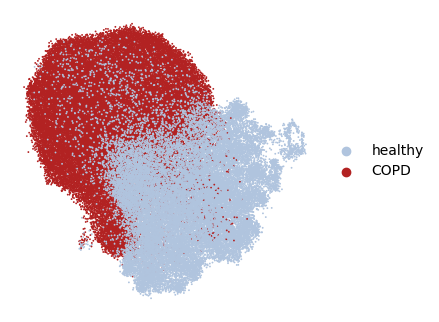

In [6]:
#cells from health donors and COPD
sc.pl.umap(adata, color = 'health_status', cmap = gray_red, size = 7,
           ax = plt.figure(figsize=(4,4), dpi= 100).gca(),
           use_raw = True, frameon = False,title = '')

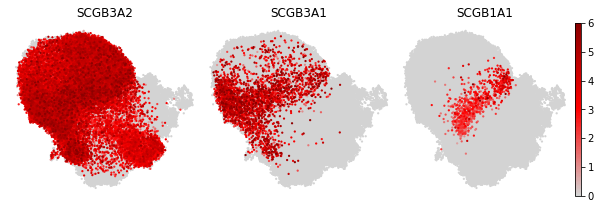

In [7]:
# gene expression of SCGB3A2, SCGB3A1, SCGB1A1 in ATII cells

fig = plt.figure(1, figsize = (9,3))
ax1 = fig.add_axes([0.1,0.1, 0.3,0.8])
ax2 = fig.add_axes([0.4,0.1, 0.3,0.8])
ax3 = fig.add_axes([0.7,0.1, 0.3,0.8])

sc.pl.umap(adata, color = 'SCGB3A2', cmap = gray_red, size = 20, vmin = 0,vmax=6,ax = ax1,
           show = False, use_raw = True, frameon = False,colorbar_loc=None)
sc.pl.umap(adata, color = 'SCGB3A1', cmap = gray_red, size = 20, vmin = 0,vmax=6,ax = ax2,
           show = False, use_raw = True, frameon = False,colorbar_loc=None)
sc.pl.umap(adata, color = 'SCGB1A1', cmap = gray_red, size = 20, vmin = 0,vmax=6,ax = ax3,
           show = False, use_raw = True, frameon = False)
plt.show()

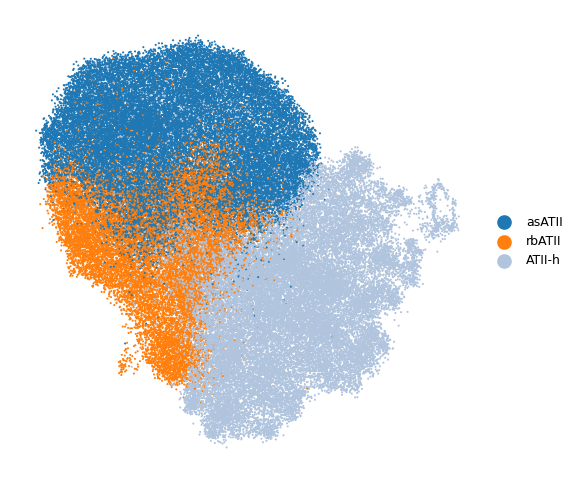

In [8]:
# ATII sub-clusters based on expressions of SCGB genes and tissue localizations
sc.pl.umap(adata, color = "3c_AT2", ax = plt.figure(figsize=(4, 4), dpi= 150).gca(),size =4,
          legend_fontsize = 6, frameon = False, title = '')

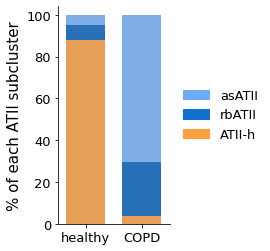

In [9]:
# percentage of each ATII subcluster
xlabel = "health_status"
cell_types_label = '3c_AT2'
cols = ['#1f77b4', '#ff7f0e','lightsteelblue']
celltypes = adata.obs[cell_types_label].cat.categories
order = adata.obs[xlabel].cat.categories.values
relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (2, 4), order =['healthy', 'COPD'],
                               errbar = False, cols = ['#6facf7','#1071d1','#ffa040'], width = 0.7)    

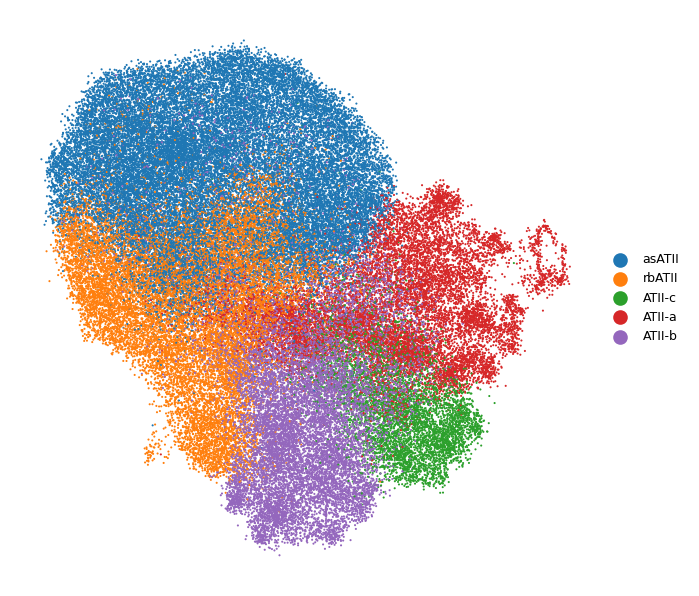

In [10]:
# ATII sub-clusters in both COPD and healthy samples
sc.pl.umap(adata, color = "5c_AT2", ax = plt.figure(figsize=(5, 5), dpi= 150).gca(),size = 4,
          legend_fontsize = 6, frameon = False, title = '')

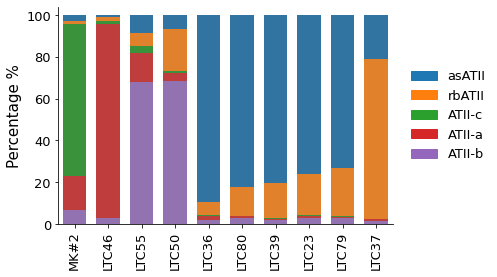

In [11]:
xlabel = "internal_id"
cell_types_label = '5c_AT2'
cols = adata.uns["%s_colors" %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories
order = adata.obs[xlabel].cat.categories.values
relFreqs = codes.calc_relFreq(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
codes.plot_cluster_composition(relFreqs, xlabel = xlabel, figsize = (6, 4), 
                               order = ['MK#2', 'LTC46', 'LTC55','LTC50',  'LTC36', 'LTC80', 'LTC39', 
                                        'LTC23', 'LTC79','LTC37'], errbar = False, cols = cols, width = 0.7) 

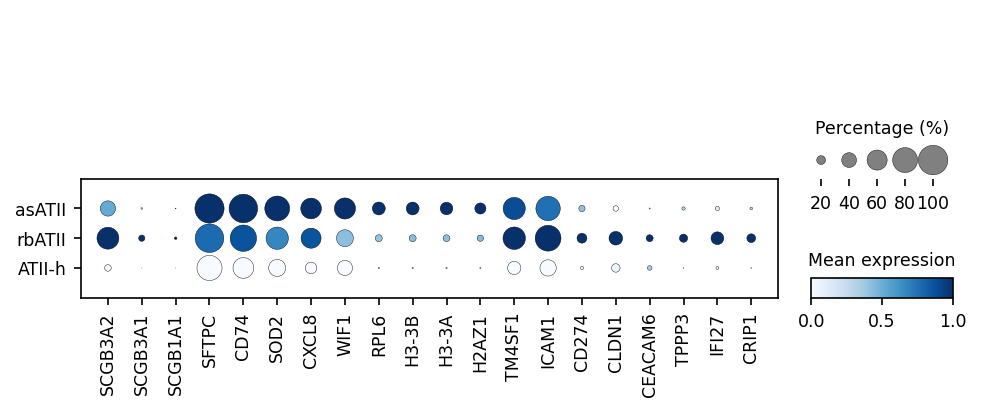

In [12]:
# Dot plot of selected marker genes identified in asATII and rbATII cells
marker_1 = ['SCGB3A2','SCGB3A1','SCGB1A1','SFTPC','CD74','SOD2', 'CXCL8', 'WIF1', 
          'RPL6', 'H3-3B', 'H3-3A', 'H2AZ1','TM4SF1','ICAM1','CD274','CLDN1','CEACAM6','TPPP3','IFI27','CRIP1']
sc.pl.dotplot(adata,
             marker_1, groupby = '3c_AT2', color_map = 'Blues', standard_scale='var',
             colorbar_title='Mean expression', size_title='Percentage (%)',
             ax = plt.figure(figsize=(7.5, 2.5), dpi= 150).gca(),swap_axes = False,
             title = "")

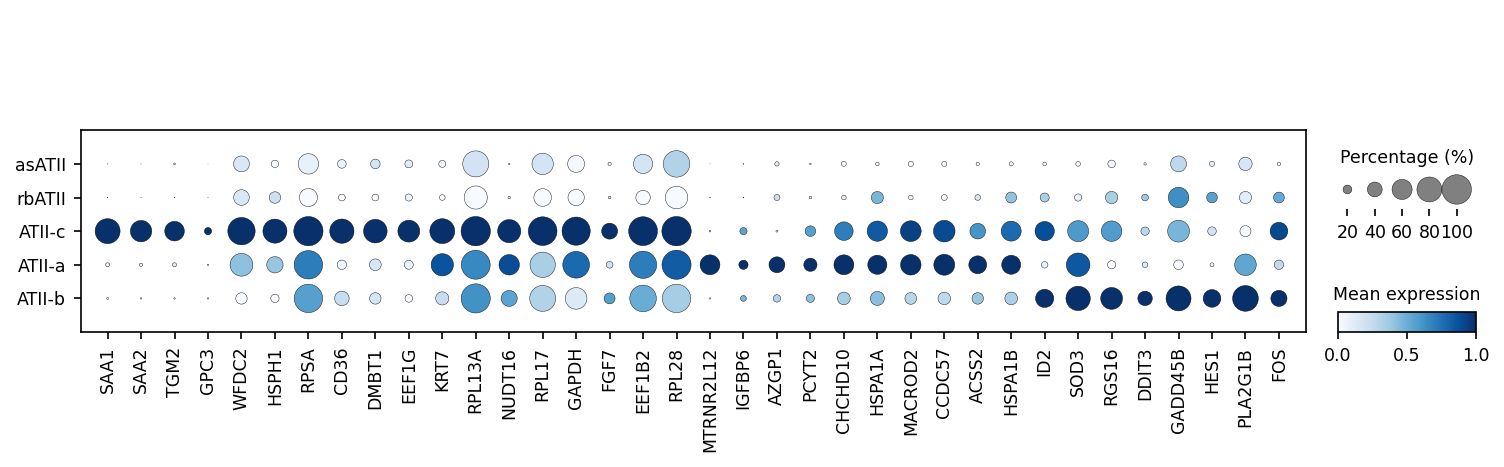

In [13]:
# Dot plot showing expressions of marker genes in ATII-c cells.

marker_2 = ['SAA1', 'SAA2', 'TGM2', 'GPC3', 'WFDC2', 'HSPH1', 'RPSA', 'CD36', 'DMBT1', 
            'EEF1G', 'KRT7', 'RPL13A', 'NUDT16', 'RPL17', 'GAPDH', 'FGF7', 'EEF1B2', 
            'RPL28', 'MTRNR2L12', 'IGFBP6', 'AZGP1', 'PCYT2', 'CHCHD10', 'HSPA1A', 
            'MACROD2', 'CCDC57', 'ACSS2', 'HSPA1B', 'ID2', 'SOD3', 'RGS16', 'DDIT3', 
            'GADD45B', 'HES1', 'PLA2G1B', 'FOS']

sc.pl.dotplot(adata,
             marker_2, groupby = '5c_AT2', color_map = 'Blues', standard_scale='var',
             colorbar_title='Mean expression', size_title='Percentage (%)',
             ax = plt.figure(figsize=(12, 2.8), dpi= 150).gca(),swap_axes = False,
             title = "")

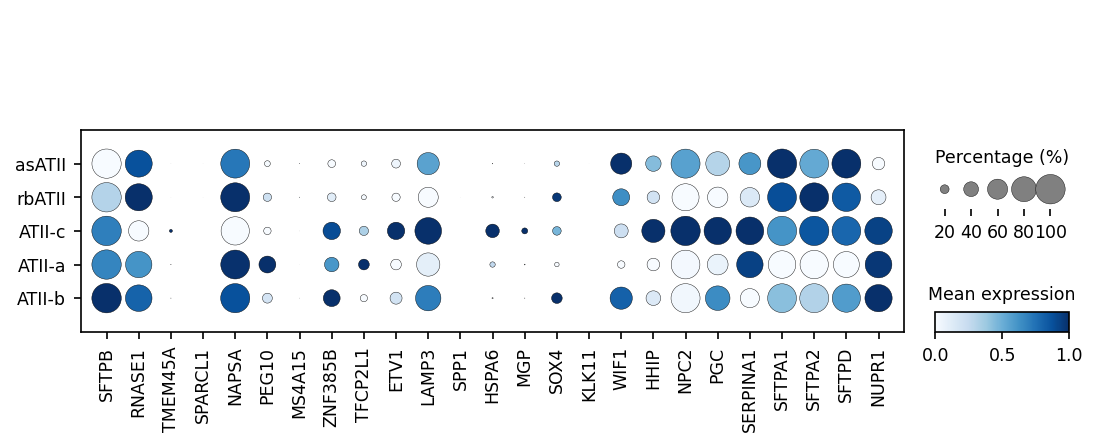

In [14]:
# Expression of published marker genes in ATII sub-populations of emphysematous and heathy lungs 

marker_3 = ['SFTPB','RNASE1','TMEM45A','SPARCL1','NAPSA','PEG10','MS4A15','ZNF385B','TFCP2L1',
          'ETV1','LAMP3','SPP1','HSPA6','MGP','SOX4','KLK11','WIF1','HHIP','NPC2','PGC','SERPINA1',
          'SFTPA1','SFTPA2','SFTPD','NUPR1']
sc.pl.dotplot(adata,
             marker_3, groupby = '5c_AT2', color_map = 'Blues', standard_scale='var',
             colorbar_title='Mean expression', size_title='Percentage (%)',
             ax = plt.figure(figsize=(8.5, 2.8), dpi= 150).gca(),swap_axes = False,
             title = "")